# TP6 : K-means

## 1 Travaux pratiques

### 1.1 Méthode des centres mobiles (K-means)

#### 1.1.1 Etude des K-means sur Iris

In [77]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import plot_clustering, scatterplot_pca
from src.kmeans_stability import kmeans_dataset

In [78]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [79]:
X = iris_df.drop(['target', 'target_name'], axis=1)
y = iris_df['target']

(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

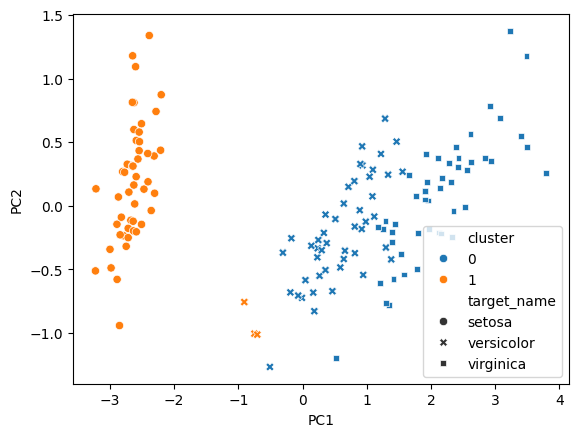

In [80]:
K = 2
kmeans = KMeans(n_clusters=K, init="random")
kmeans.fit(X)
y_pred = kmeans.labels_
df = iris_df.copy()
df["cluster"] = y_pred
scatterplot_pca(columns = df.columns.drop(["target", "target_name"]), data = df, style="target_name", hue="cluster")


(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

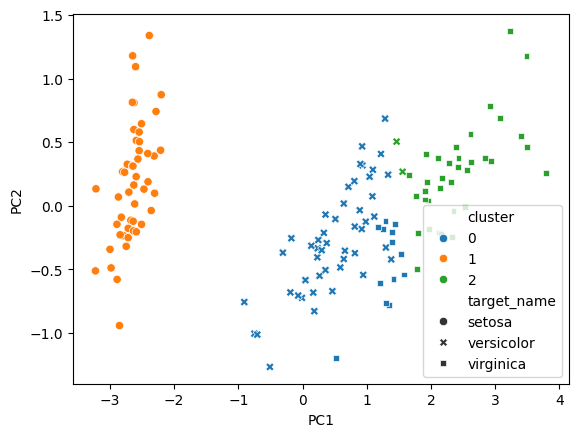

In [81]:
K = 3
kmeans = KMeans(n_clusters=K, init="random")
kmeans.fit(X)
y_pred = kmeans.labels_
df = iris_df.copy()
df["cluster"] = y_pred
scatterplot_pca(columns = df.columns.drop(["target", "target_name"]), data = df, style="target_name", hue="cluster")


(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

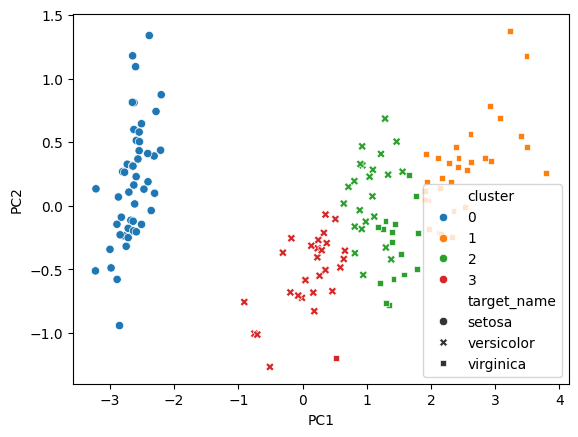

In [82]:
K = 4
kmeans = KMeans(n_clusters=K, init="random")
kmeans.fit(X)
y_pred = kmeans.labels_
df = iris_df.copy()
df["cluster"] = y_pred
scatterplot_pca(columns = df.columns.drop(["target", "target_name"]), data = df, style="target_name", hue="cluster")


#### Génération des modèles de K-means

In [83]:
gen = kmeans_dataset(X, n_clusters_list=[2, 3, 4], strategies=["k-means++", "random"], tries=10)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
df = df.astype({
    "seed": "int32",
    "n_clusters": "int32"
})
df

,seed,init,n_clusters,inertia
0,0,k-means++,2,152.347952
1,1,k-means++,2,152.347952
2,2,k-means++,2,152.347952
3,3,k-means++,2,152.347952
4,4,k-means++,2,152.347952
5,5,k-means++,2,152.347952
6,6,k-means++,2,152.347952
7,7,k-means++,2,152.347952
8,8,k-means++,2,152.347952
9,9,k-means++,2,152.347952


#### Visualisation de la distribution des inerties

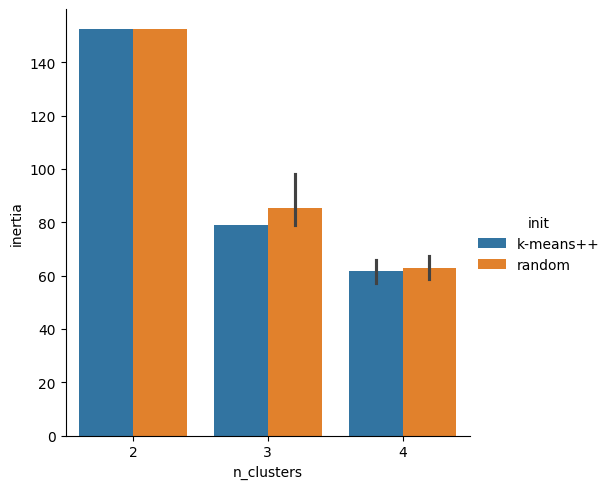

In [84]:
sns.catplot(x="n_clusters", y="inertia", hue="init", data=df, kind="bar")

#### Mauvaise classification

Text(0.5, 1.0, 'Inertie : 142.7540625')

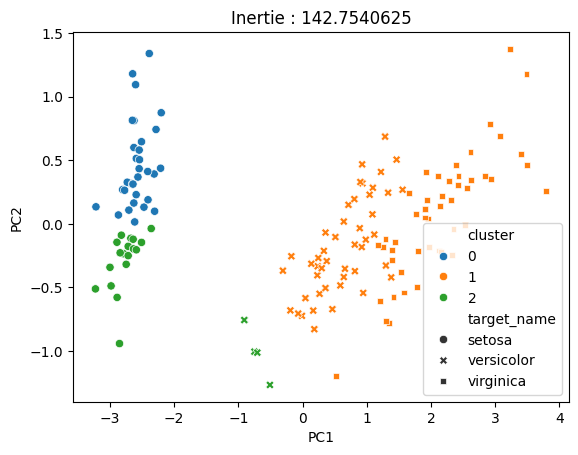

In [85]:
# On a obtenu une mauvaise classification pour n = 3, rs = 5, init = "random"

kmeans = KMeans(n_clusters=3, init="random", random_state=5, n_init=1)
kmeans.fit(X)
y_pred = kmeans.labels_
df_bad = iris_df.copy()
df_bad["cluster"] = y_pred
scatterplot_pca(columns = df_bad.columns.drop(["target", "target_name"]), data = df_bad, style="target_name", hue="cluster")
plt.title(f"Inertie : {kmeans.inertia_}")

#### Méthode du coude

In [86]:
gen = kmeans_dataset(X, n_clusters_list=range(1, 11), strategies=["k-means++"], tries=1)
df = pd.DataFrame(gen, columns=["seed", "init", "n_clusters", "inertia"])
df = df.astype({
    "seed": "int32",
    "n_clusters": "int32"
})
df

,seed,init,n_clusters,inertia
0,0,k-means++,1,681.370600
1,0,k-means++,2,152.347952
2,0,k-means++,3,78.855666
3,0,k-means++,4,57.228473
4,0,k-means++,5,49.827741
5,0,k-means++,6,42.421546
6,0,k-means++,7,34.420192
7,0,k-means++,8,30.064593
8,0,k-means++,9,28.715857
9,0,k-means++,10,27.462119


Text(0.5, 1.0, 'Méthode du coude')

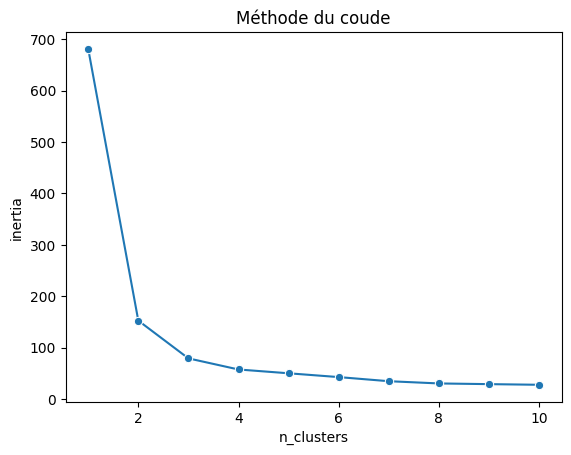

In [87]:
sns.lineplot(x="n_clusters", y="inertia", data=df, marker="o")
plt.title("Méthode du coude")

#### 1.1.2 Données crabs

In [124]:
crabs = pd.read_csv("data/crabs.csv", sep="\s+")
crabs

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8


In [125]:
# Prétraitement des données

X = crabs.drop(["sp", "sex", "index"], axis=1)
y = crabs["sp"]
taille = crabs.FL + crabs.RW + crabs.CL + crabs.CW + crabs.BD
X = X.div(taille, axis=0)
crabs = pd.concat([X, crabs[["sp", "sex", "index"]]], axis=1)
X_pretraite = crabs.drop(["sp", "sex", "index"], axis=1)
X_pretraite

,FL,RW,CL,CW,BD
0,0.142355,0.117750,0.282953,0.333919,0.123023
1,0.140127,0.122611,0.288217,0.331210,0.117834
2,0.139183,0.118003,0.287443,0.338880,0.116490
3,0.139332,0.114659,0.291727,0.335269,0.119013
4,0.141414,0.115440,0.292929,0.331890,0.118326
...,...,...,...,...,...
195,0.147079,0.123711,0.283162,0.317526,0.128522
196,0.147318,0.116090,0.283096,0.320434,0.133062
197,0.147376,0.115747,0.286676,0.318977,0.131225
198,0.148810,0.113757,0.284392,0.322090,0.130952


#### Classification en K = 2 clusters

(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

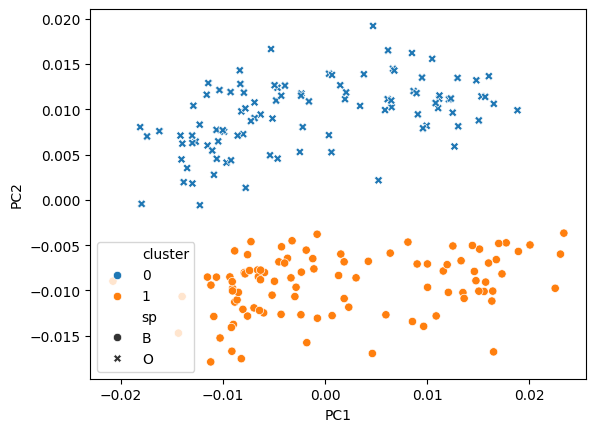

In [126]:
kmeans = KMeans(n_clusters=2, init="random")
kmeans.fit(X_pretraite)
y_pred = kmeans.labels_
df = crabs.copy()
df["cluster"] = y_pred
scatterplot_pca(columns = df.columns.drop(["sp", "sex", "index"]), data = df, hue="cluster", style="sp")

#### Classification en K = 3 clusters

(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

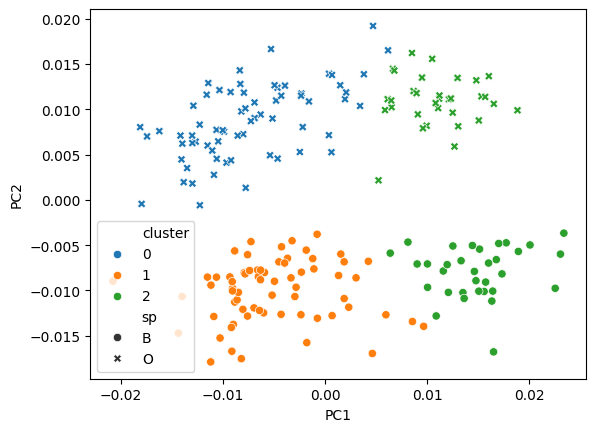

In [127]:
kmeans = KMeans(n_clusters=3, init="random", n_init = 1000)
kmeans.fit(X_pretraite)
y_pred = kmeans.labels_
df = crabs.copy()
df["cluster"] = y_pred
scatterplot_pca(columns = df.columns.drop(["sp", "sex", "index"]), data = df, hue="cluster", style="sp")

#### Classification en K = 4 clusters

In [128]:
def get_new_class(row):
    if row["sp"] == "B" and row["sex"] == "M":
        return 0
    if row["sp"] == "O" and row["sex"] == "M":
        return 1
    if row["sp"] == "B" and row["sex"] == "F":
        return 2
    if row["sp"] == "O" and row["sex"] == "F":
        return 3

crabs["new_class"] = crabs.apply(lambda row : get_new_class(row), axis=1)
crabs

,FL,RW,CL,CW,BD,sp,sex,index,new_class
0,0.142355,0.117750,0.282953,0.333919,0.123023,B,M,1,0
1,0.140127,0.122611,0.288217,0.331210,0.117834,B,M,2,0
2,0.139183,0.118003,0.287443,0.338880,0.116490,B,M,3,0
3,0.139332,0.114659,0.291727,0.335269,0.119013,B,M,4,0
4,0.141414,0.115440,0.292929,0.331890,0.118326,B,M,5,0
...,...,...,...,...,...,...,...,...,...
195,0.147079,0.123711,0.283162,0.317526,0.128522,O,F,46,3
196,0.147318,0.116090,0.283096,0.320434,0.133062,O,F,47,3
197,0.147376,0.115747,0.286676,0.318977,0.131225,O,F,48,3
198,0.148810,0.113757,0.284392,0.322090,0.130952,O,F,49,3


(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

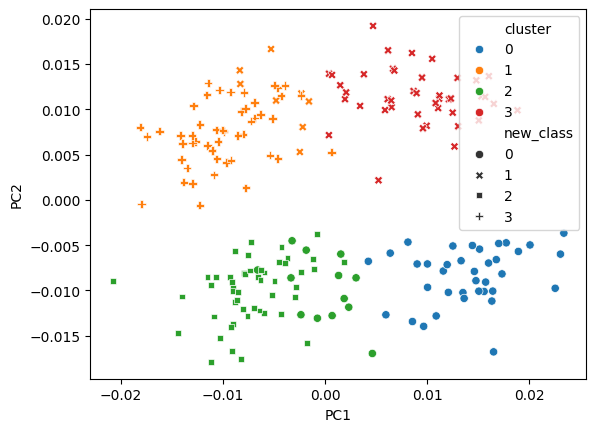

In [129]:
kmeans = KMeans(n_clusters=4, init="random")
kmeans.fit(X_pretraite)
y_pred = kmeans.labels_
df = crabs.copy()
df["cluster"] = y_pred
scatterplot_pca(columns = df.columns.drop(["sp", "sex", "index", "new_class"]), data = df, hue="cluster", style="new_class")

#### Comparaison avec la partition initiale

In [130]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(crabs["new_class"], y_pred)

0.7512388410567427